The visualization of the histograms in the notebook "Filtering regular pairs" allows to separate the data in some groups: 

* Gaussian-like
* Left-grouped
* Composed, or added up
* Curious
* Any-other
* Not clustered yet (---)

Below I manually label the pairs I found for CaseAntennaObserving. First, let's prepare the environment and some ancillary functions.

In [21]:
from src import *
from src.models.AlmaClasses import *
palette = PaletteFileDB(filename='../data/processed/colors-almaAntenna.pkl', colorFunction=paintedForAlmaAntennas )
colors=palette.getColors()

#db = DelaysFileDB( caseName="CaseAntennaInArray", path= '../' + config.FILEPATH_DB+"/delays") 
db = DelaysFileDB( caseName="CaseAntennaObserving", path= '../' + config.FILEPATH_DB+"/delays") 
#db = DelaysFileDB( caseName="CaseRadioSetup", path= '../' + config.FILEPATH_DB+"/delays") 

MIN_NUMBER_OF_SAMPLES = 100
meaningfulPairs = {}
for (a,b) in db.pair_names():
    ipp = db._instances_per_pair[(a,b)]
    dpp = db._delays_per_pair[(a,b)]
    percen = 100.0*ipp/db.total_cases()
    
    if dpp >= MIN_NUMBER_OF_SAMPLES:    
        meaningfulPairs[(a,b)] = { 0:percen, 1:ipp,  2:dpp, 3:"---"} 


Some pairs are manually labelled:

In [22]:
# Gaussian-Like:
for (a,b) in [ (464, 480), (465, 476), (465, 480), (466, 482), (466, 477), (468, 475), (468, 482), (469, 476), (470, 474), (470, 480), (472, 482), 
               (464, 482), (465, 473), (466, 480), (468, 478), (470, 477), (471, 478), (471, 480), (472, 477), (494, 505), (501, 503), (491, 495), 
               (402, 579), (492, 387) ]:
    meaningfulPairs[ (a, b) ][3] = "Gaussian-like"
    
# Left grouped
for (a,b) in [ (464, 469), (465, 469), (466, 468), (475, 479), (497, 498), (501, 505), (502, 504), (503, 504), (505, 506), 
               (400, 579), (464, 471), (465, 466), (473, 474), (476, 478), (511, 512), (505, 503) ]:
    meaningfulPairs[ (a, b) ][3] = "Left"

# Summed up, or two processes coupled 
for (a,b) in [ (473, 477), (474, 476), (474, 480), (477, 483), (478, 483), (480, 484), (481, 483), (481, 484), (495, 498) ]:
    meaningfulPairs[ (a, b) ][3] = "Summed"

# Curious!
for (a,b) in [ (468, 471), (493, 497) ]:
    meaningfulPairs[ (a, b) ][3] = "Curious"

# Any other
for (a,b) in [ (439, 487), (464, 487), (465, 495), (466, 515), (467, 400), (468, 514), (469, 498), (470, 515), (473, 498), (475, 487), (476, 486), (476, 495), (476, 497), (477, 497), (478, 486), (483, 500), (484, 402), (484, 495), (488, 402), (498, 514), 
               (580, 578), (464, 500), (469, 514), (467, 514), (471, 491), (471, 495), (474, 491), (475, 491), (478, 492), (479, 486), (497, 515), (480, 498), (469, 497), (470, 498), (479, 491), (479, 497), (476, 500), (466, 402), (477, 495), (474, 498), 
               (581, 580), (464, 400), (500, 514), (473, 486), (464, 491), (483, 497), (467, 402), (480, 495), (470, 495) ]:
    meaningfulPairs[ (a, b) ][3] = "Any-Other"


In [23]:
print "(a,   b)  \t %    \t ipp \t dpp \t type"
print "========== \t ==== \t === \t === \t ===="

for (a,b) in sorted(meaningfulPairs.keys()):
    v = meaningfulPairs[(a,b)]
    print "(%s, %s) \t %.1f \t %s \t %s \t %s" % ( a, b, v[0], v[1],  v[2], v[3] )


(a,   b)  	 %    	 ipp 	 dpp 	 type
========== 	 ==== 	 === 	 === 	 ====
(387, 495) 	 17.9 	 63 	 285 	 ---
(387, 497) 	 17.9 	 63 	 285 	 ---
(387, 498) 	 17.9 	 63 	 285 	 ---
(387, 500) 	 17.9 	 63 	 285 	 ---
(400, 578) 	 22.2 	 78 	 187 	 ---
(400, 579) 	 22.2 	 78 	 187 	 Left
(400, 580) 	 22.2 	 78 	 187 	 ---
(400, 581) 	 22.2 	 78 	 187 	 ---
(402, 400) 	 34.2 	 120 	 224 	 ---
(402, 578) 	 22.2 	 78 	 187 	 ---
(402, 579) 	 22.2 	 78 	 187 	 Gaussian-like
(402, 580) 	 22.2 	 78 	 187 	 ---
(402, 581) 	 22.2 	 78 	 187 	 ---
(439, 387) 	 29.3 	 103 	 103 	 ---
(439, 400) 	 29.6 	 104 	 104 	 ---
(439, 402) 	 29.6 	 104 	 104 	 ---
(439, 486) 	 29.6 	 104 	 104 	 ---
(439, 487) 	 29.6 	 104 	 104 	 Any-Other
(439, 494) 	 31.6 	 111 	 111 	 ---
(464, 400) 	 29.6 	 104 	 104 	 Any-Other
(464, 402) 	 29.6 	 104 	 104 	 ---
(464, 465) 	 100.0 	 351 	 351 	 ---
(464, 466) 	 100.0 	 351 	 351 	 ---
(464, 467) 	 100.0 	 351 	 351 	 ---
(464, 468) 	 100.0 	 351 	 351 	 ---
(464, 469) 	

In [14]:
# Ancillary functions for analysis

%matplotlib inline
from pandas import Series
from matplotlib import pyplot
import numpy as np
pyplot.rcParams["figure.figsize"] = (22,6)

In [15]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Analysis for different type of series

In [16]:
def analysis_for(type_of_analysis):
    for (a, b, v) in [ (a, b, v) for ((a,b), v) in meaningfulPairs.iteritems() if v[3] == type_of_analysis ] :
        print "color %s:" % a
        print colors[a]; print
        print "color %s:" % b
        print colors[b]; print
        fig, ax = pyplot.subplots(1,3)
#         fig, ax = pyplot.subplots(1,3,  sharey='row')
        ax[0].plot( sorted( db.getDelays(a,b) ) )
        ax[0].set_title( "Ordered %d samples for color= (%s, %s) - %s" % (v[2], a, b, v[3]) )

        ax[1].hist(  db.getDelays(a,b), orientation='horizontal', bins=10 )
        ax[1].set_title( "Histogram for color= (%s, %s) - type %s" % (a, b, v[3]) )
        
        # https://www.kdnuggets.com/2017/02/removing-outliers-standard-deviation-python.html
        d2 = Series(db.getDelays(a,b))
        mean = np.mean(d2, axis=0)
        sd = np.std(d2, axis=0)
        d3 = [ x for x in d2 if (x > mean - 3 * sd) and (x < mean + 3 * sd) ]

        ax[2].hist( d3, orientation='horizontal', bins=10 )
        ax[2].set_title( "Outliers removed (3-sigma)" )

        pyplot.show()



## Analysis for Gaussian-like

color 465:
[maci::LibraryManager - maci::LibraryManager::load] Full path '${PATH}/libAntInterferometryController.so'

color 476:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: NEW -> INITIALIZING



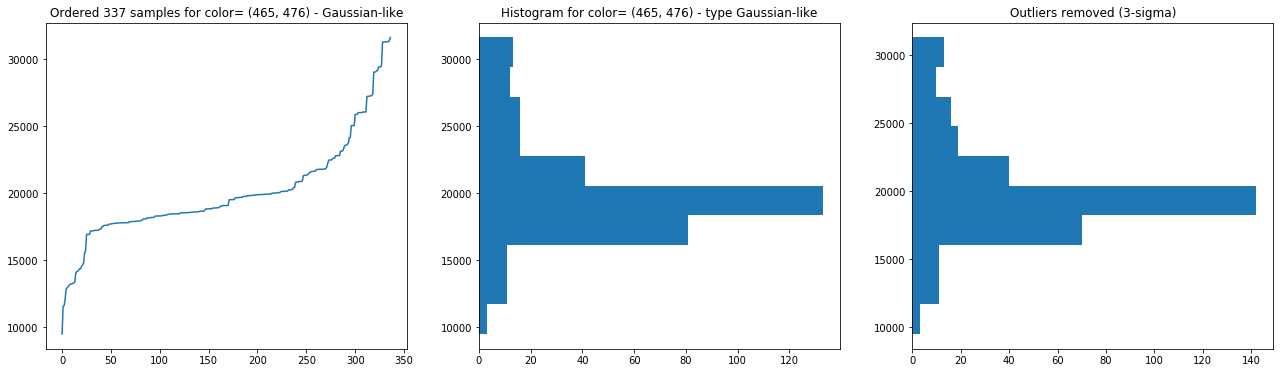

color 466:
[maci::LibraryManager - maci::LibraryManager::load] Loaded '${PATH}/libAntInterferometryController.so'.

color 482:
[CONTROL/${ANT}/TOTALPOWER - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/IFProc_B)



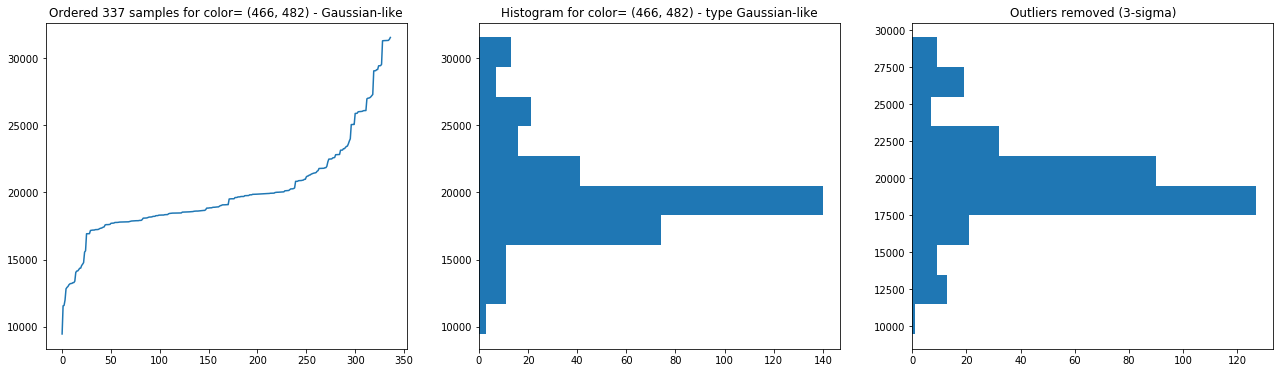

color 494:
[CONTROL/${ANT}/FrontEnd/WCA${N} - virtual void WCAImpl::offsetCoarseByFloog(NetSidebandMod::NetSideband, double, bool)] WCAImpl::offsetCoarseByFloog -- coarse: ${N}

color 505:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol ${N} current u = ${N}[V]



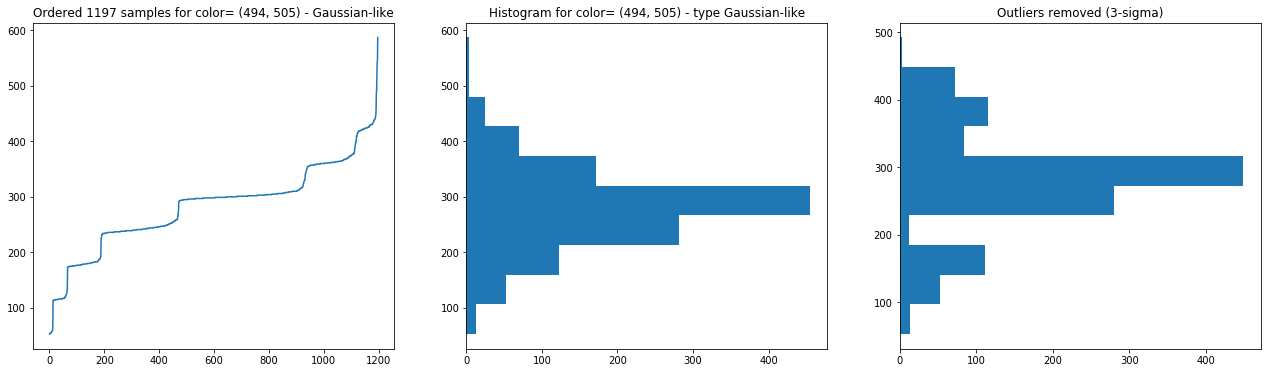

color 464:
[maci::LibraryManager - maci::LibraryManager::load] Request to load 'AntInterferometryController'.

color 480:
[CONTROL/${ANT}/TOTALPOWER - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT})



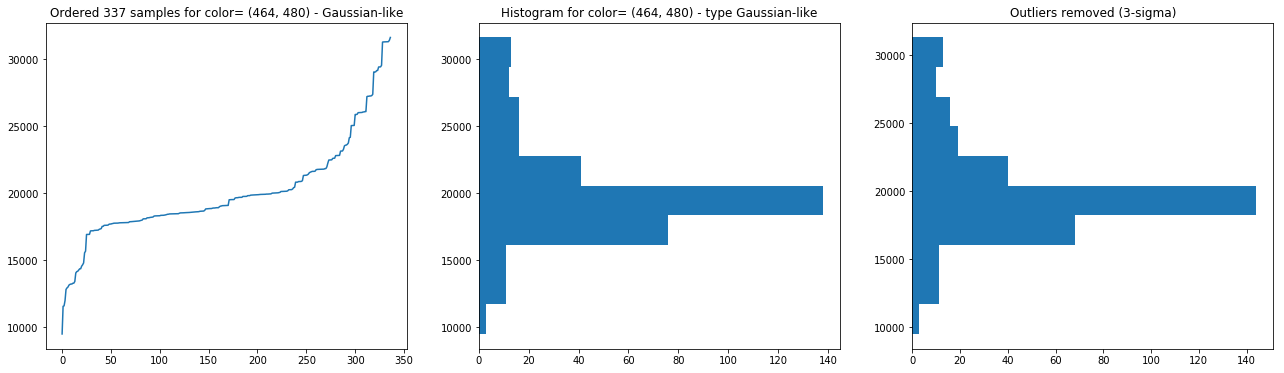

color 468:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/AntInterferometryController: INITIALIZING -> INITIALIZED

color 475:
[maci::LibraryManager - maci::LibraryManager::load] Loaded '${PATH}/libTotalPowerImpl.so'.



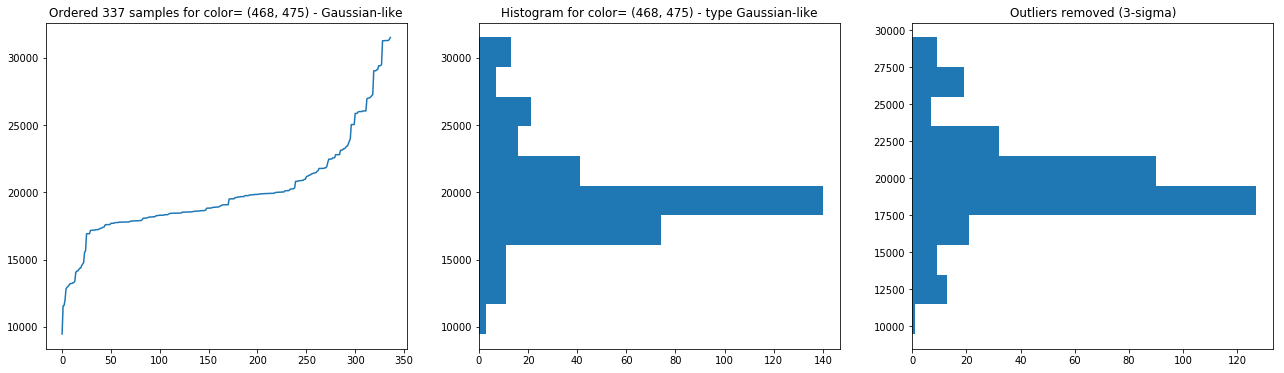

color 501:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol${N}: Target ij=${N}

color 503:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol${N}: ijc=${N},ij${N}=${N},ij${N}=${N}



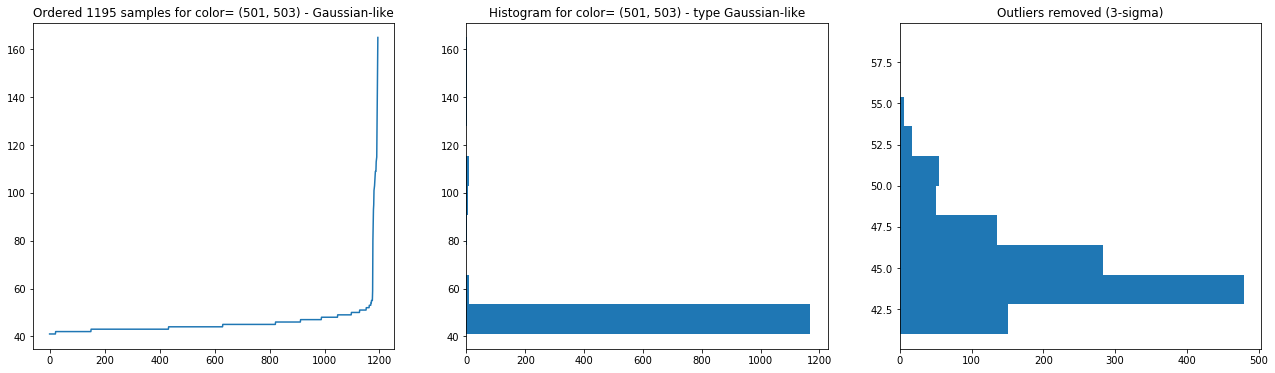

color 466:
[maci::LibraryManager - maci::LibraryManager::load] Loaded '${PATH}/libAntInterferometryController.so'.

color 477:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: INITIALIZING -> INITIALIZED



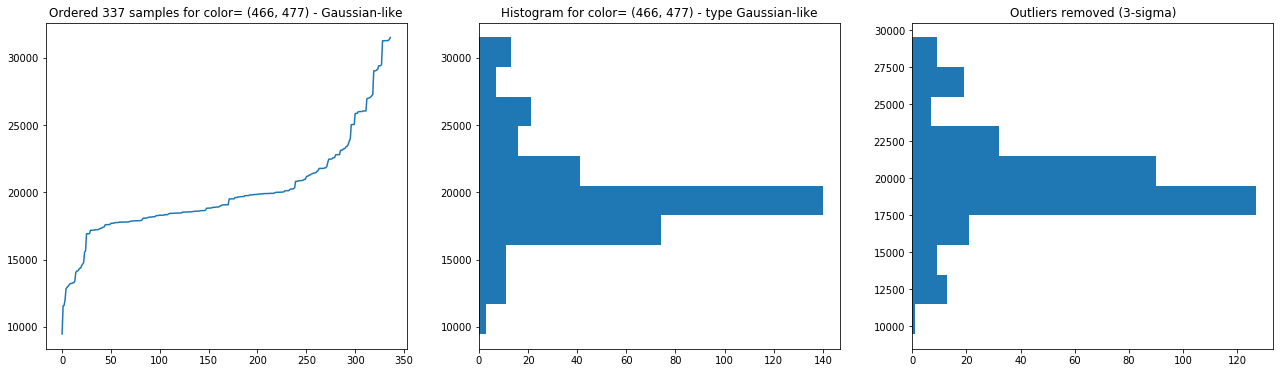

color 491:
[CONTROL/${ANT}/FrontEnd/LPR - setCntlOptSwitchPort] EDFA voltage set to ${N} when changing from band ${N} to ${N}

color 495:
[CONTROL/${ANT}/FrontEnd/WCA${N} - maximizeIFTP] (initial) coarse tune: : ${N} Initial IFTP: ${N}



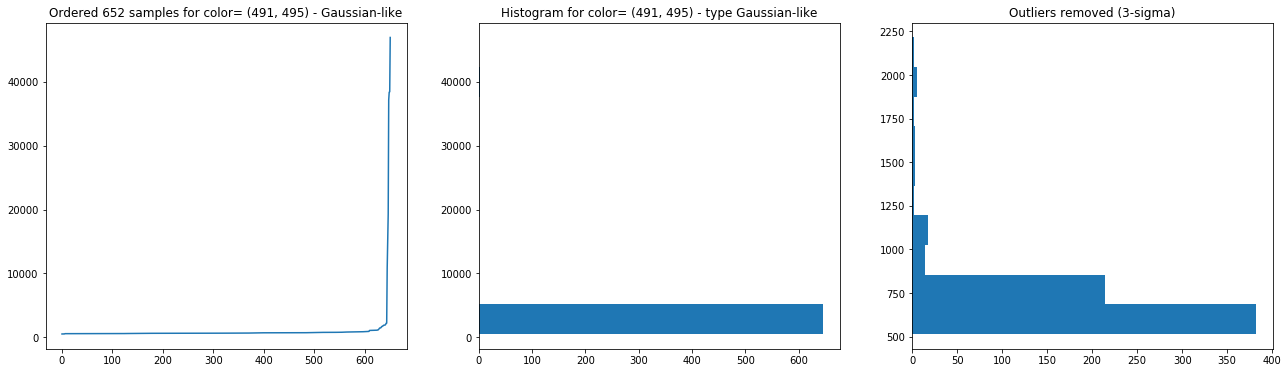

color 470:
[CONTROL/${ANT}/cppContainer - maci::ContainerImpl::activate_component] Component 'CONTROL/${ANT}/AntInterferometryController' activated.

color 480:
[CONTROL/${ANT}/TOTALPOWER - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT})



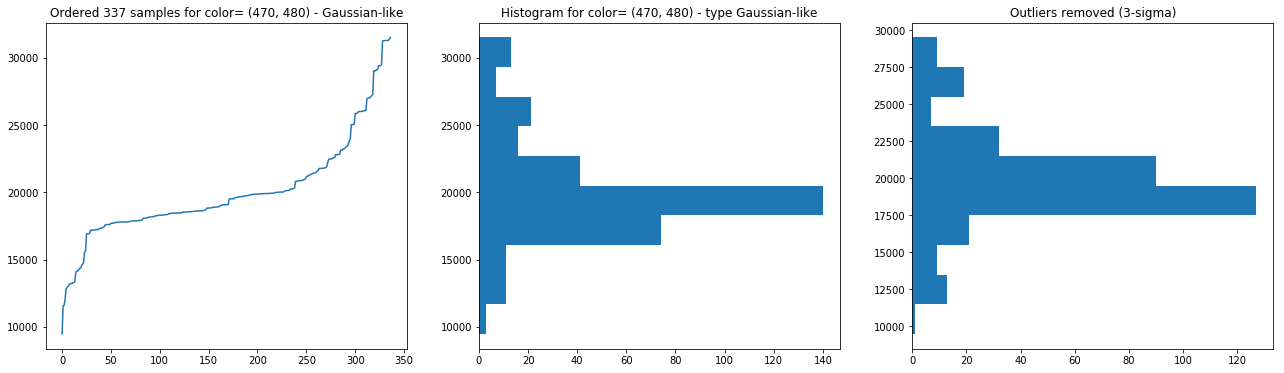

color 468:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/AntInterferometryController: INITIALIZING -> INITIALIZED

color 482:
[CONTROL/${ANT}/TOTALPOWER - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/IFProc_B)



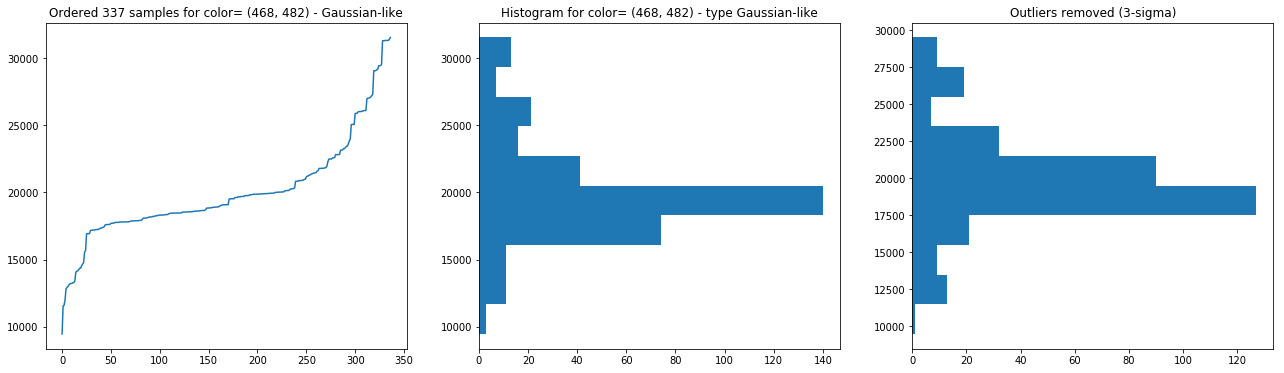

color 469:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/AntInterferometryController: INITIALIZED -> OPERATIONAL

color 476:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: NEW -> INITIALIZING



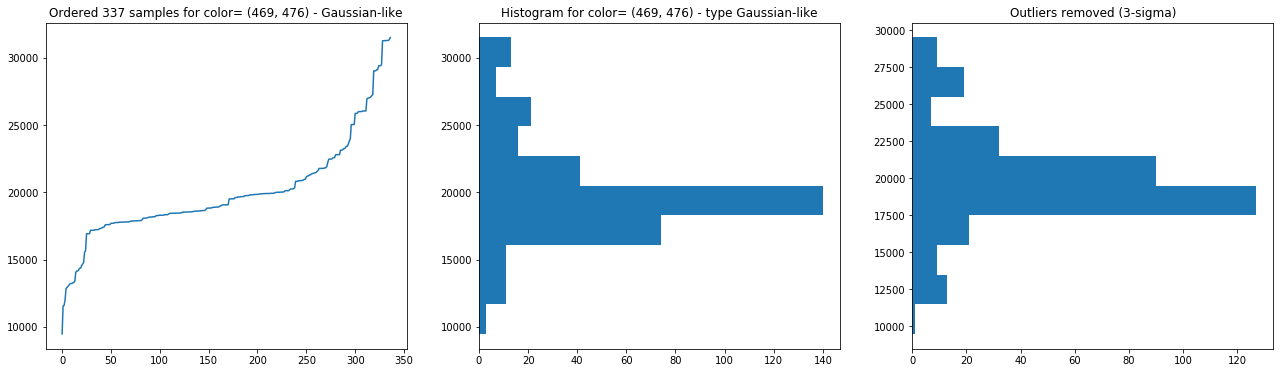

color 470:
[CONTROL/${ANT}/cppContainer - maci::ContainerImpl::activate_component] Component 'CONTROL/${ANT}/AntInterferometryController' activated.

color 474:
[maci::LibraryManager - maci::LibraryManager::load] Full path '${PATH}/libTotalPowerImpl.so'



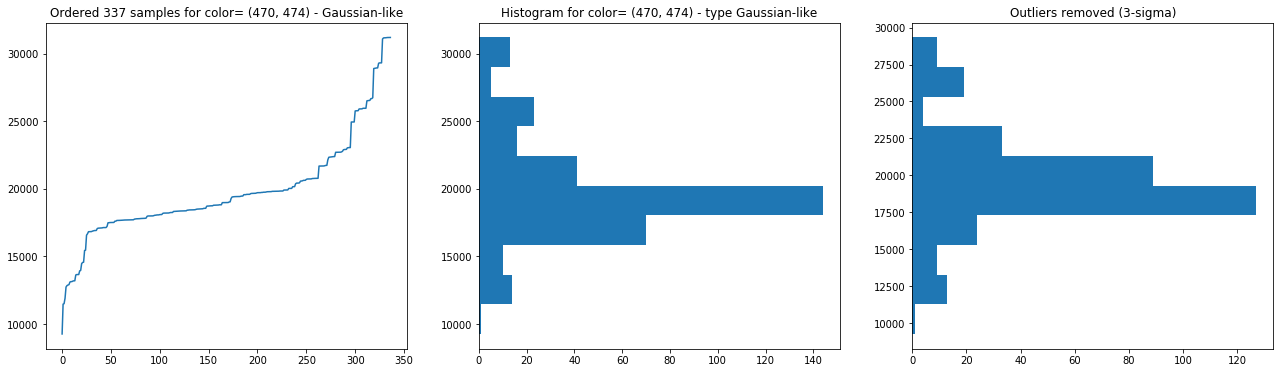

color 472:
[CONTROL/${ANT}/AntInterferometryController - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/WVR)

color 482:
[CONTROL/${ANT}/TOTALPOWER - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/IFProc_B)



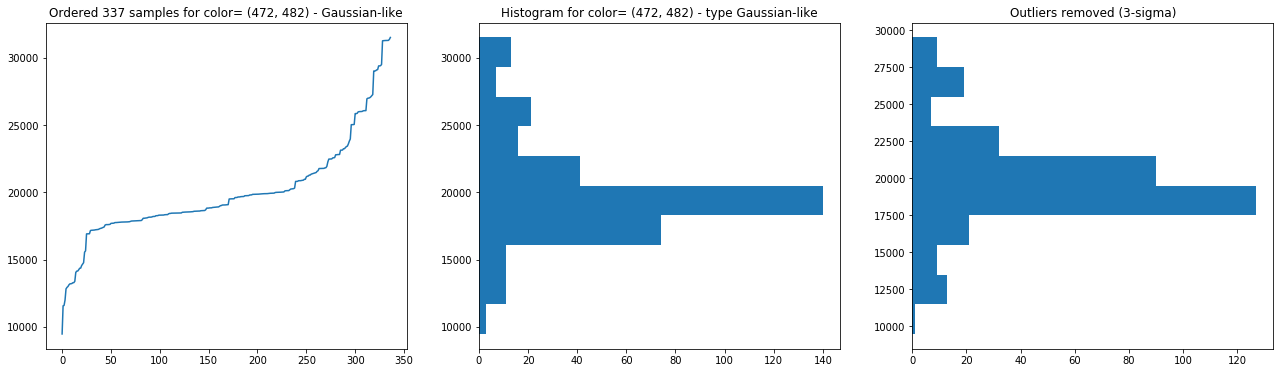

color 465:
[maci::LibraryManager - maci::LibraryManager::load] Full path '${PATH}/libAntInterferometryController.so'

color 480:
[CONTROL/${ANT}/TOTALPOWER - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT})



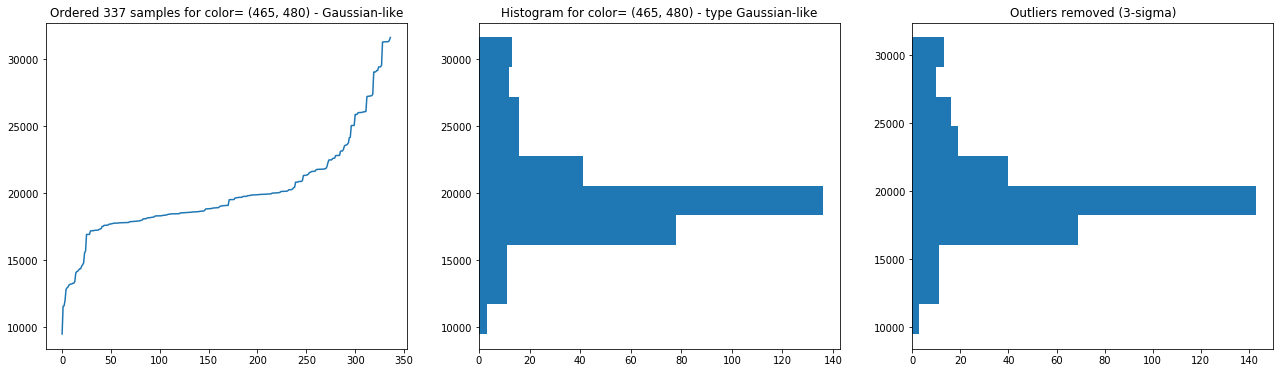

color 470:
[CONTROL/${ANT}/cppContainer - maci::ContainerImpl::activate_component] Component 'CONTROL/${ANT}/AntInterferometryController' activated.

color 477:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: INITIALIZING -> INITIALIZED



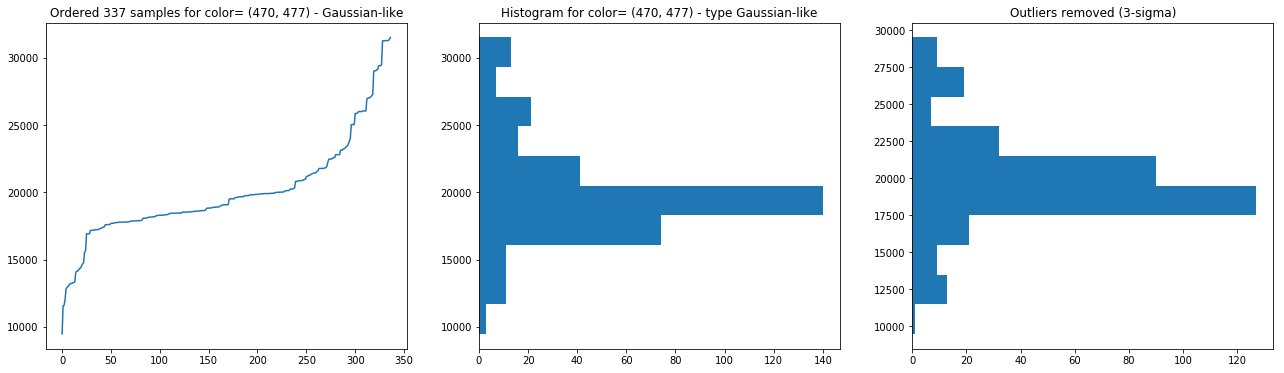

color 472:
[CONTROL/${ANT}/AntInterferometryController - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/WVR)

color 477:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: INITIALIZING -> INITIALIZED



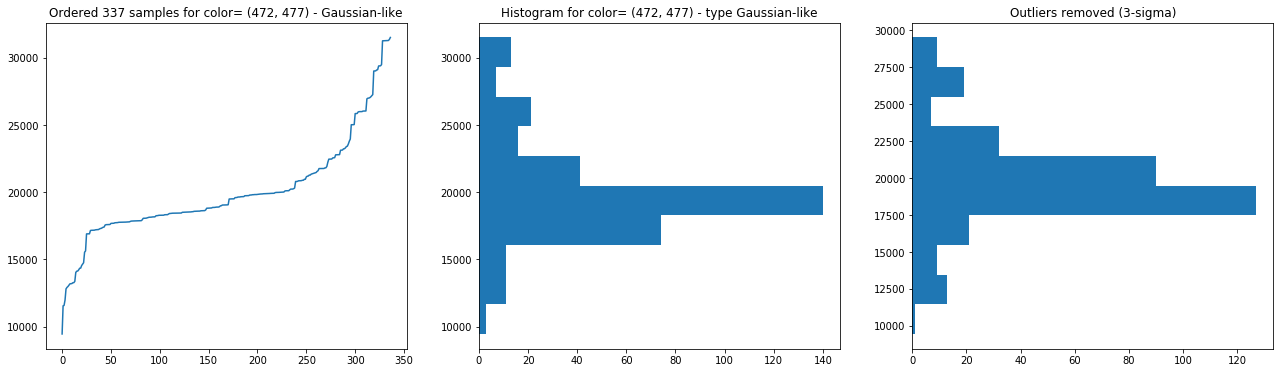

color 471:
[CONTROL/${ANT}/AntInterferometryController - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT})

color 480:
[CONTROL/${ANT}/TOTALPOWER - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT})



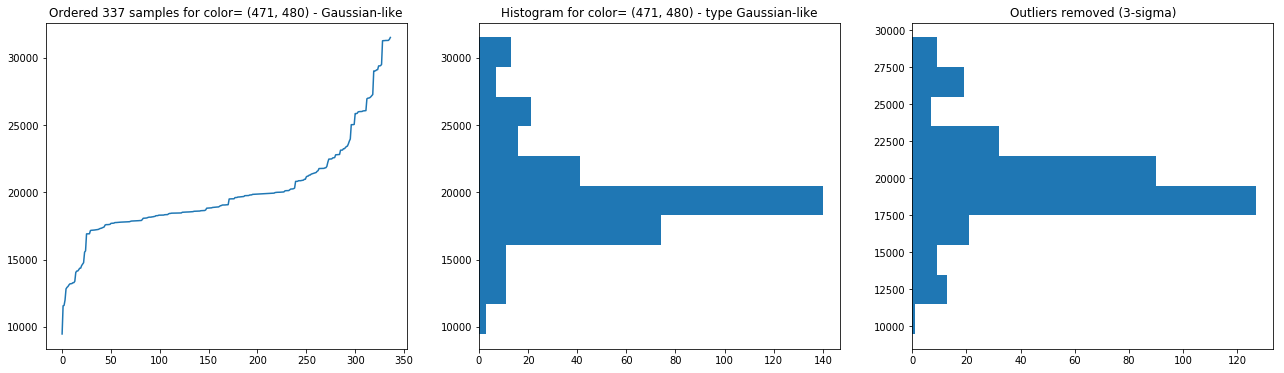

color 465:
[maci::LibraryManager - maci::LibraryManager::load] Full path '${PATH}/libAntInterferometryController.so'

color 473:
[maci::LibraryManager - maci::LibraryManager::load] Request to load 'TotalPowerImpl'.



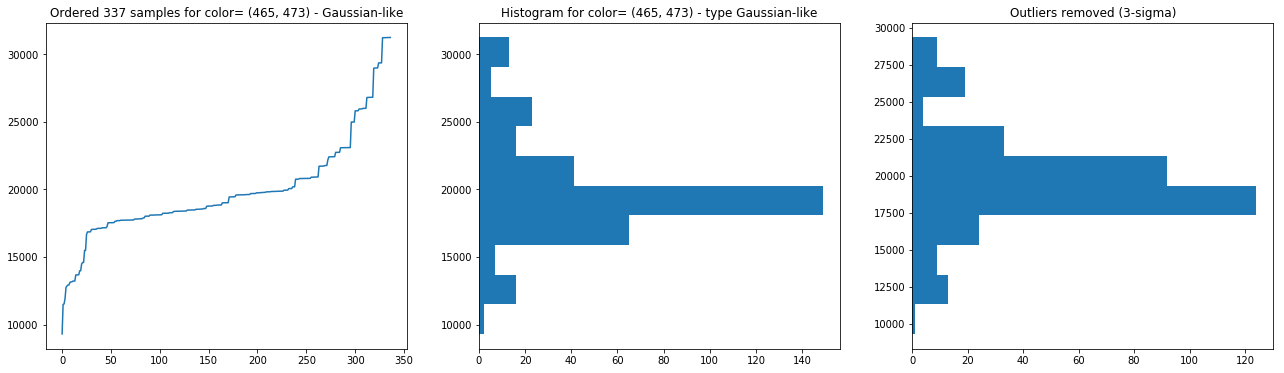

color 492:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::selectBandInternal(ReceiverBandMod::ReceiverBand)] Receiver band #${N} has been selected

color 387:
[CONTROL/${ANT}/FrontEnd/WCA${N} - SetFrequency] WCA Frequency set to: ${N}



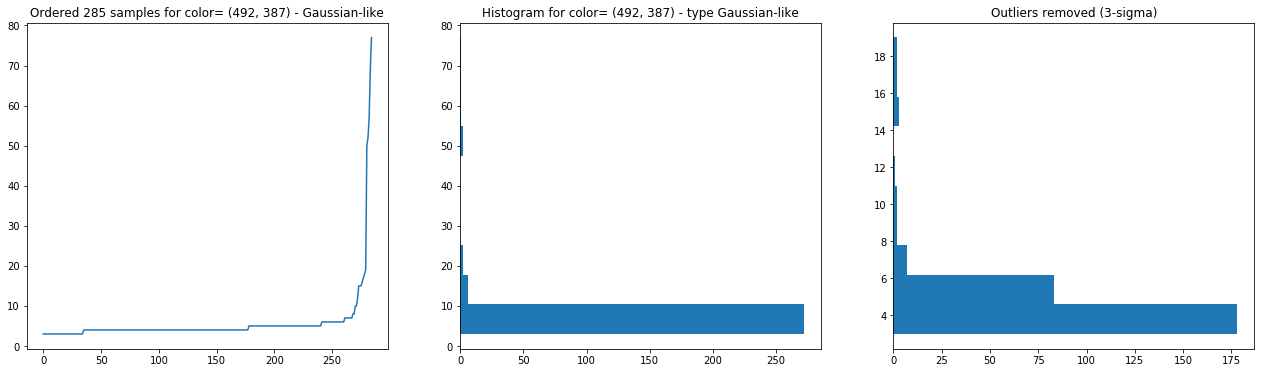

color 471:
[CONTROL/${ANT}/AntInterferometryController - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT})

color 478:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: INITIALIZED -> OPERATIONAL



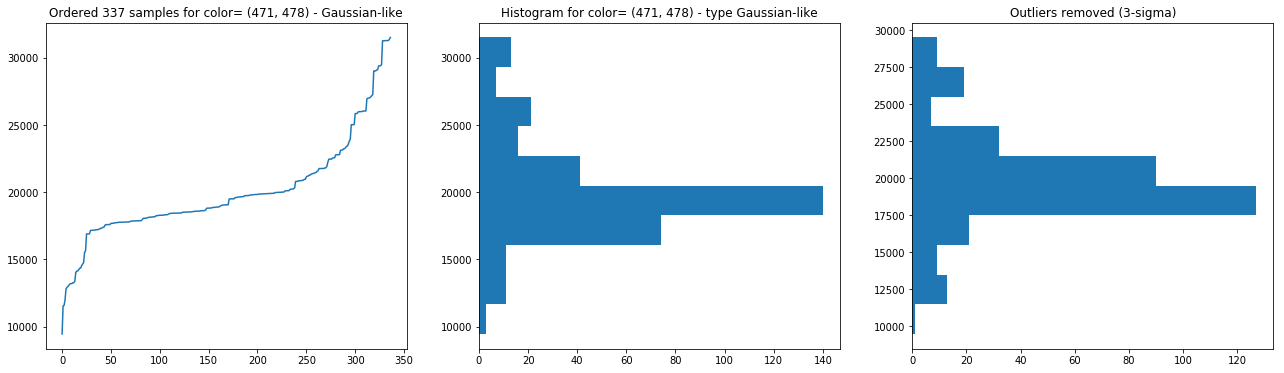

color 402:
[CONTROL/${ANT}/LOtwoBBpr_D - virtual void LO${N}Engine::setFrequency(double, Control::LOOffsettingMode, NetSidebandMod::NetSideband, ACS::Time)] Setting the LO${N} frequency to ${N}GHz at ${N}:${N}:${N}. This baseband is above the first LO. No LO offsetting will be used Retuning as this is diferent from the current state at this time

color 579:
[CONTROL/${ANT}/LOtwoBBpr_B - virtual void LO${N}Engine::setFrequency(double, Control::LOOffsettingMode, NetSidebandMod::NetSideband, ACS::Time)] Setting the LO${N} frequency to ${N}GHz at ${N}:${N}:${N}. This baseband is below the first LO. Two LO offsetting will be used Retuning as this is diferent from the current state at this time



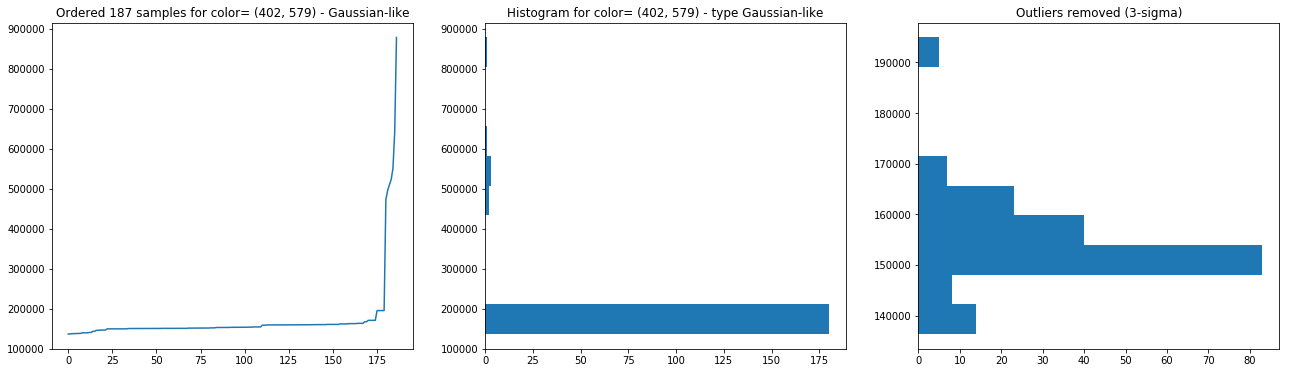

color 468:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/AntInterferometryController: INITIALIZING -> INITIALIZED

color 478:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: INITIALIZED -> OPERATIONAL



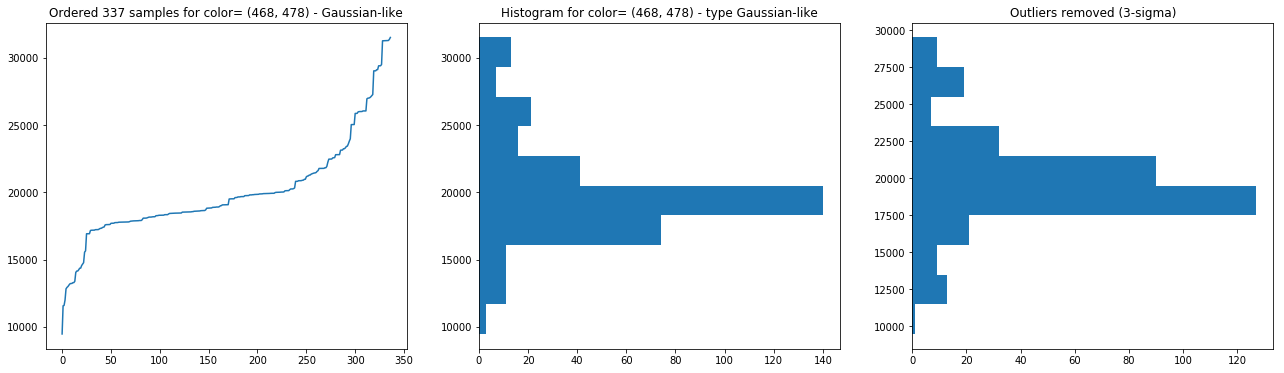

color 466:
[maci::LibraryManager - maci::LibraryManager::load] Loaded '${PATH}/libAntInterferometryController.so'.

color 480:
[CONTROL/${ANT}/TOTALPOWER - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT})



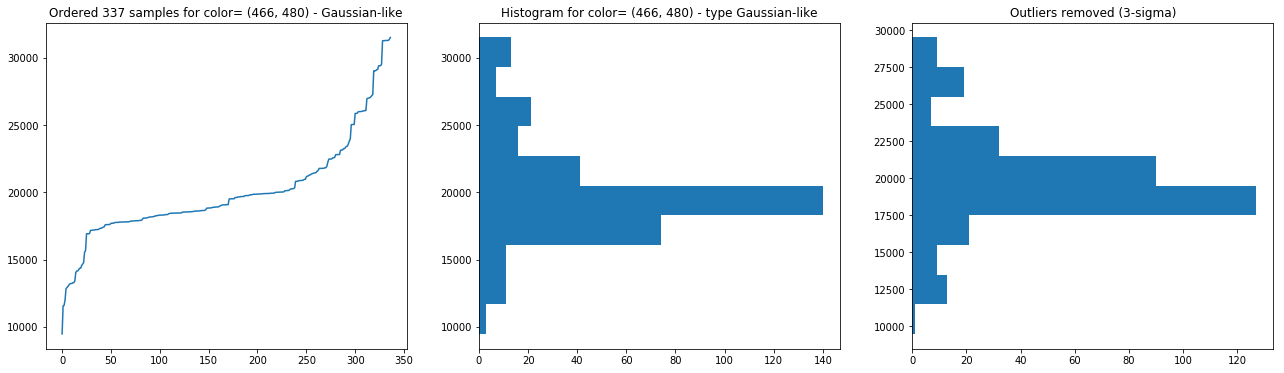

color 464:
[maci::LibraryManager - maci::LibraryManager::load] Request to load 'AntInterferometryController'.

color 482:
[CONTROL/${ANT}/TOTALPOWER - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/IFProc_B)



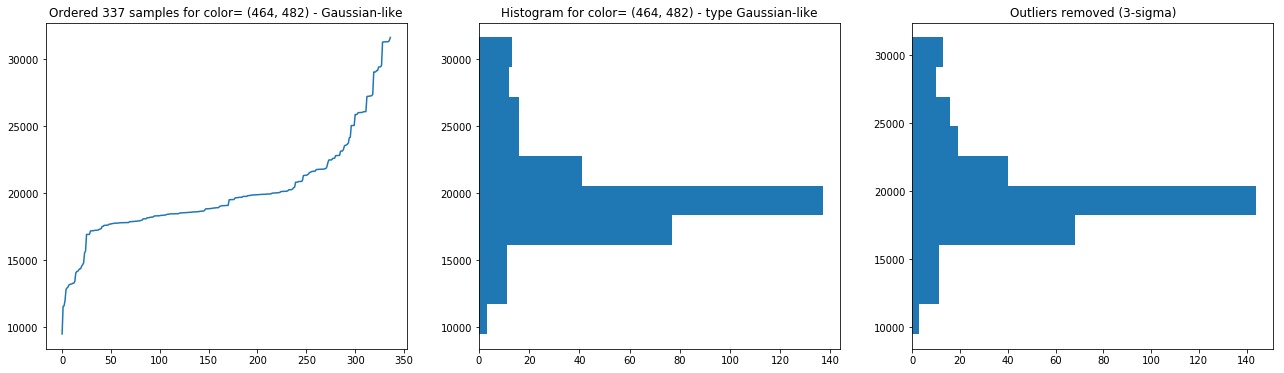

In [17]:
analysis_for( "Gaussian-like" )

## Analysis for Left-like

color 502:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol${N}: ij=${N},my=${N},ny=${N},ij${N}=${N}

color 504:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol ${N} Initial Guess u${N} = ${N}[V]



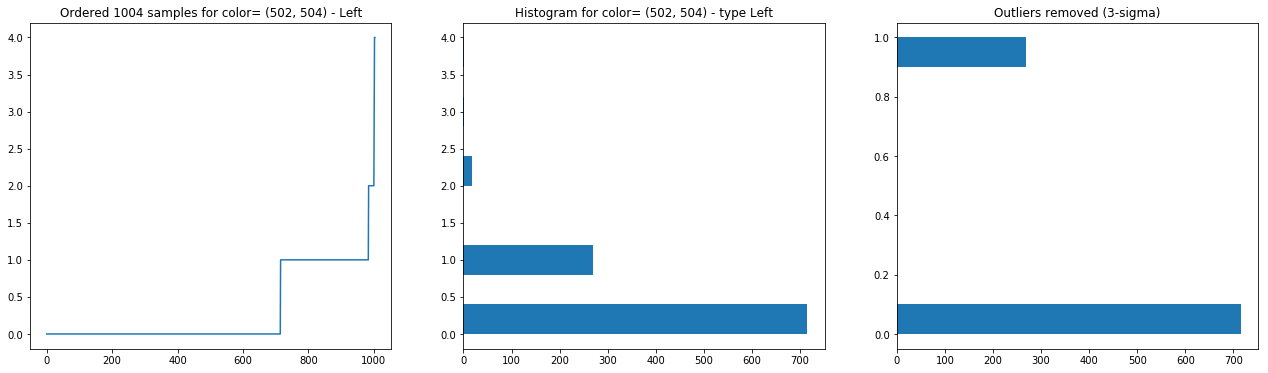

color 505:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol ${N} current u = ${N}[V]

color 506:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol${N} Set value = ${N}[V]



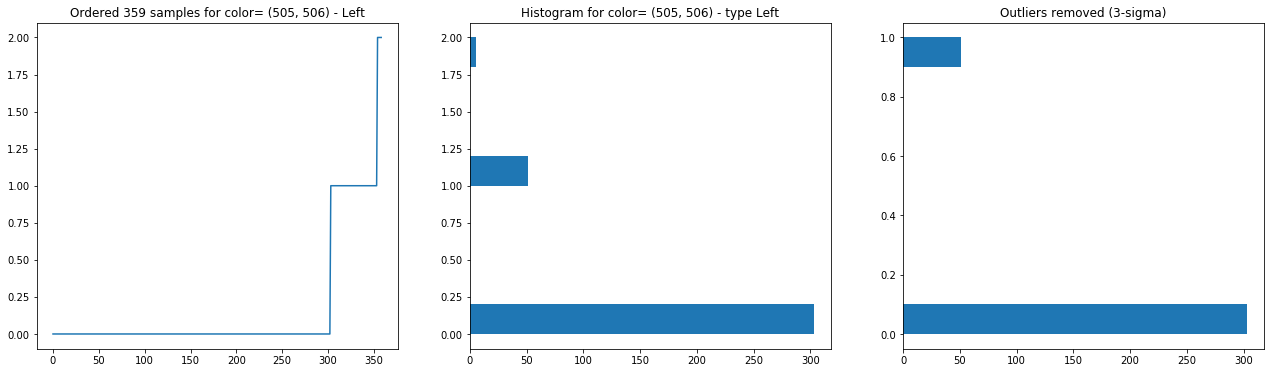

color 465:
[maci::LibraryManager - maci::LibraryManager::load] Full path '${PATH}/libAntInterferometryController.so'

color 469:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/AntInterferometryController: INITIALIZED -> OPERATIONAL



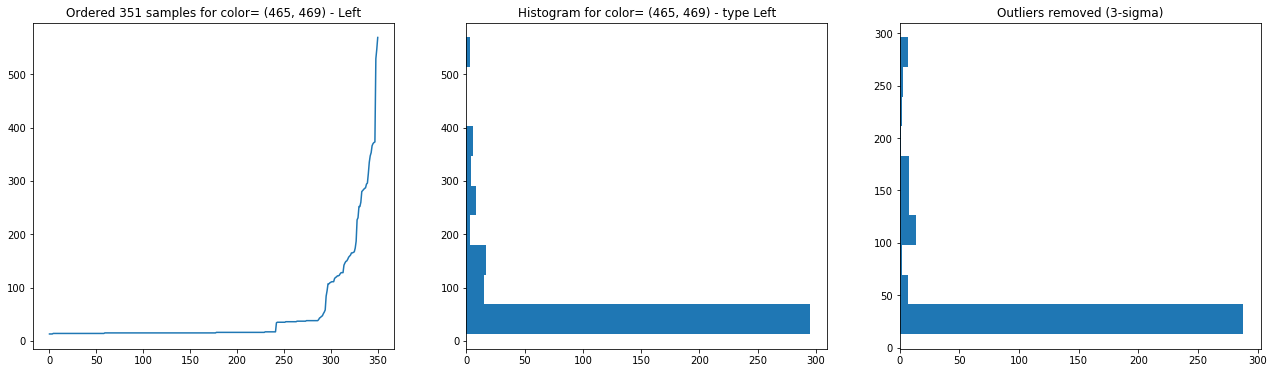

color 511:
[CONTROL/${ANT}/FrontEnd/IFSwitch - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/IFProc_B)

color 512:
[CONTROL/${ANT}/cppContainer-GL - void PositionStreamConsumer::processData(Control::MountStatusData)] At ${N}:${N}:${N} got the last needed data with a timestamp of ${N}:${N}:${N}. The delay is ${N} seconds.



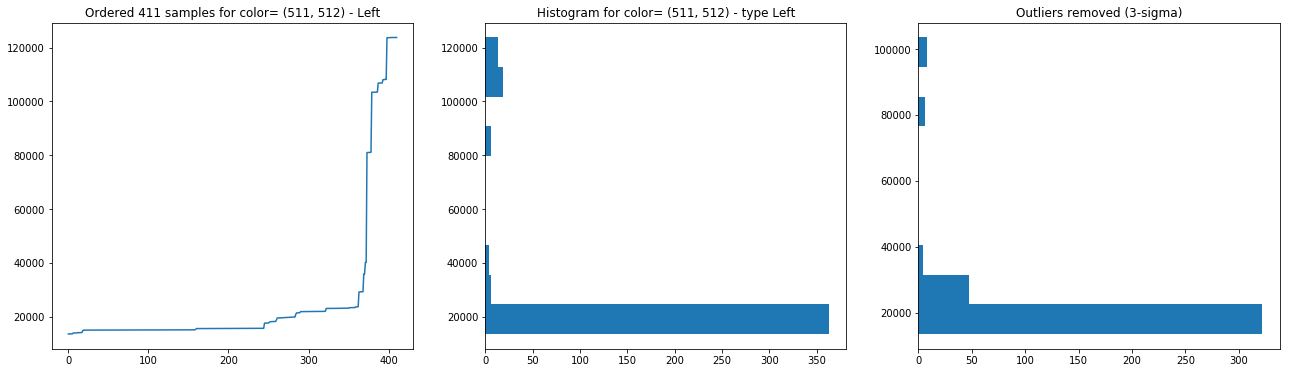

color 497:
[CONTROL/${ANT}/FrontEnd/WCA${N} - maximizeIFTP] Optimal coarse tune: : ${N} Optimal IFTP: ${N}

color 498:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::lockFrontEndInternal(Control::FrontEnd::SubscanInformation, bool, bool)] Done Offsetting Floog



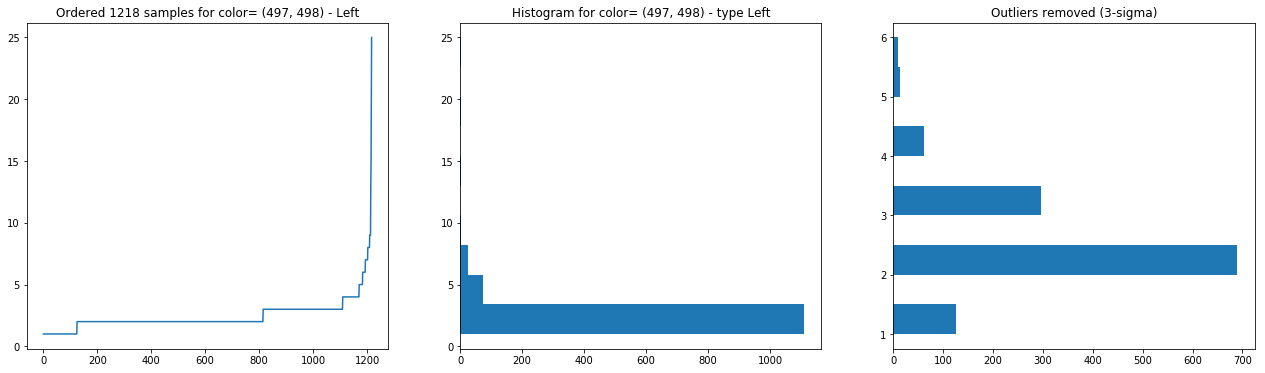

color 466:
[maci::LibraryManager - maci::LibraryManager::load] Loaded '${PATH}/libAntInterferometryController.so'.

color 468:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/AntInterferometryController: INITIALIZING -> INITIALIZED



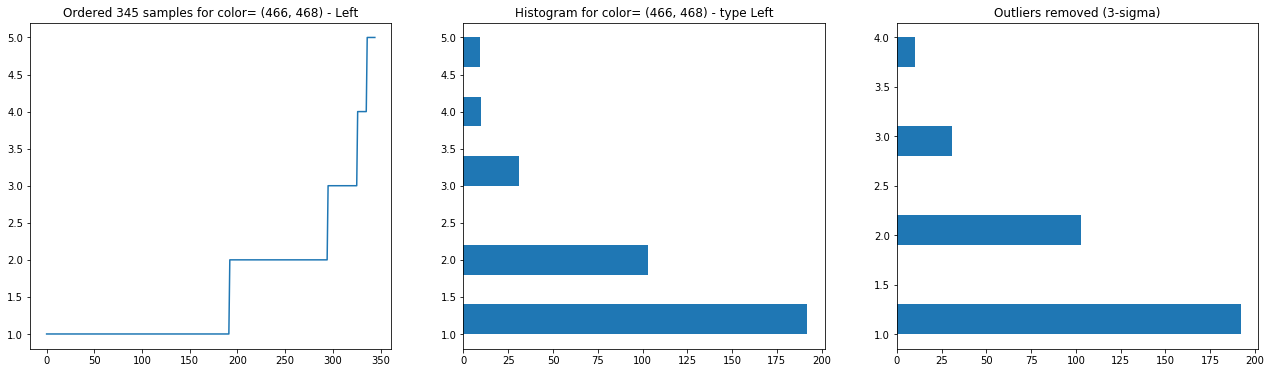

color 475:
[maci::LibraryManager - maci::LibraryManager::load] Loaded '${PATH}/libTotalPowerImpl.so'.

color 479:
[CONTROL/${ANT}/cppContainer - maci::ContainerImpl::activate_component] Component 'CONTROL/${ANT}/TOTALPOWER' activated.



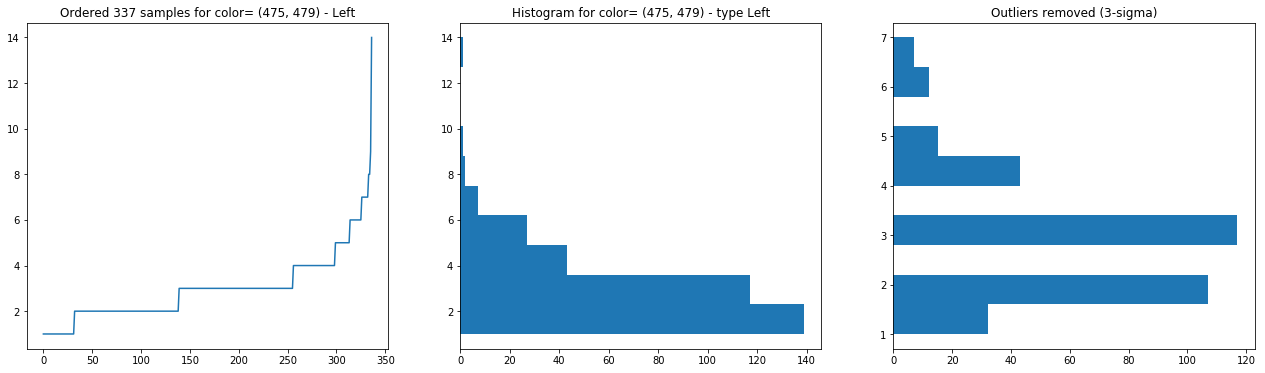

color 503:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol${N}: ijc=${N},ij${N}=${N},ij${N}=${N}

color 504:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol ${N} Initial Guess u${N} = ${N}[V]



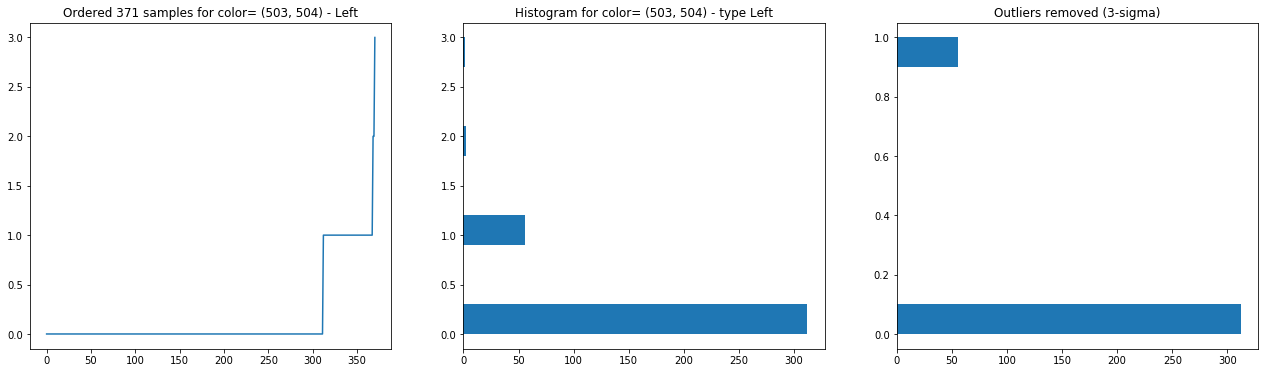

color 501:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol${N}: Target ij=${N}

color 505:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol ${N} current u = ${N}[V]



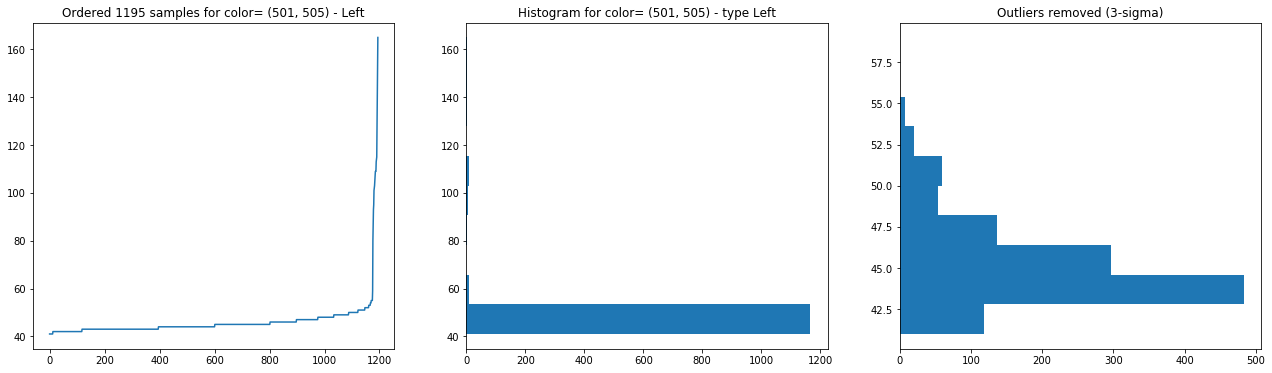

color 464:
[maci::LibraryManager - maci::LibraryManager::load] Request to load 'AntInterferometryController'.

color 469:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/AntInterferometryController: INITIALIZED -> OPERATIONAL



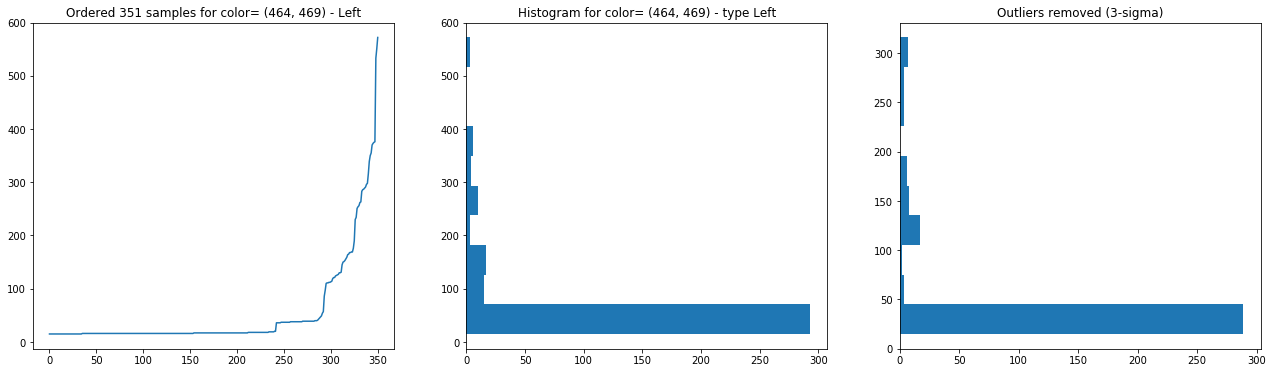

color 476:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: NEW -> INITIALIZING

color 478:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: INITIALIZED -> OPERATIONAL



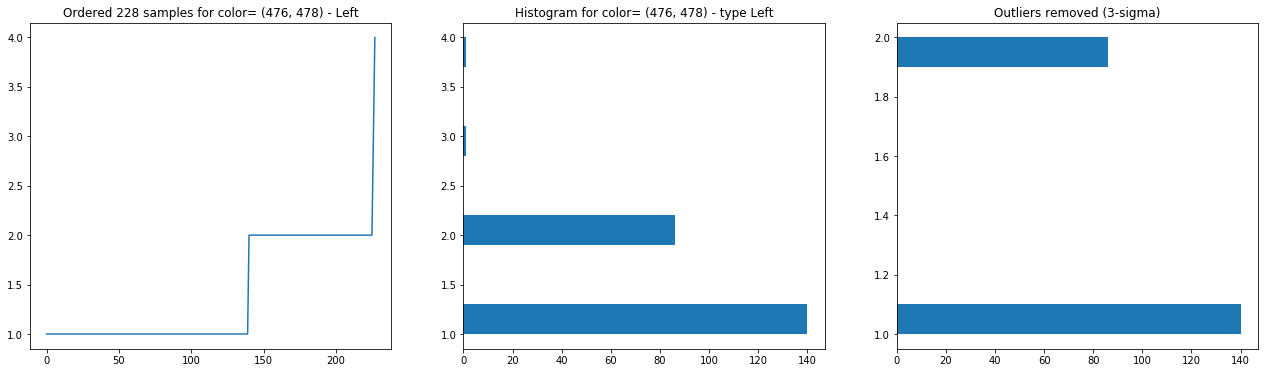

color 473:
[maci::LibraryManager - maci::LibraryManager::load] Request to load 'TotalPowerImpl'.

color 474:
[maci::LibraryManager - maci::LibraryManager::load] Full path '${PATH}/libTotalPowerImpl.so'



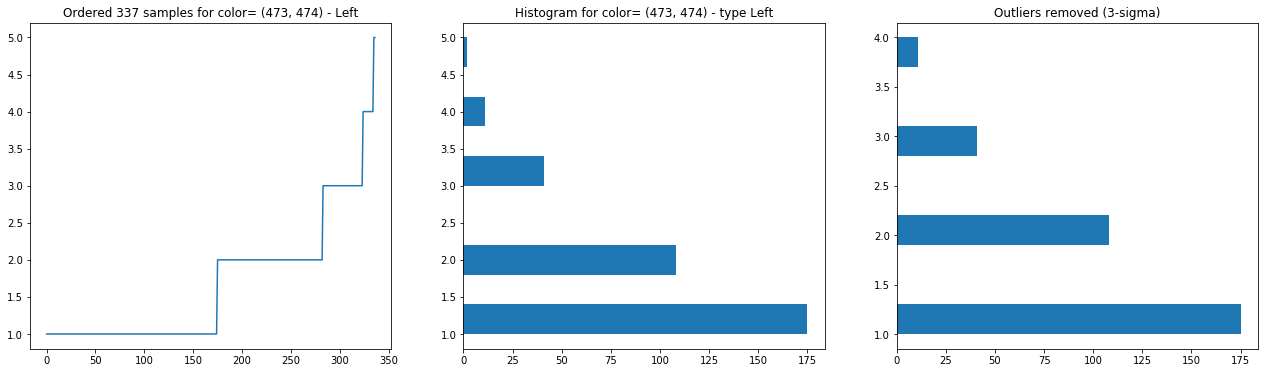

color 464:
[maci::LibraryManager - maci::LibraryManager::load] Request to load 'AntInterferometryController'.

color 471:
[CONTROL/${ANT}/AntInterferometryController - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT})



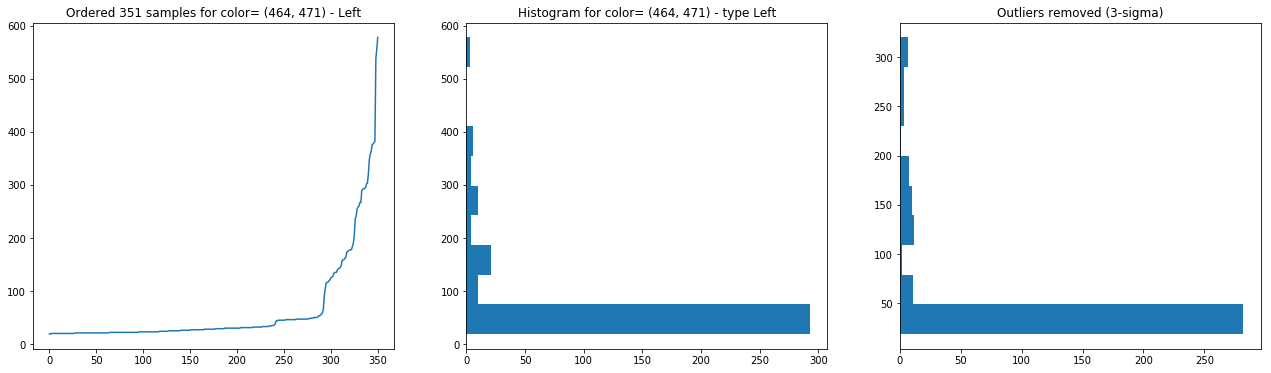

color 505:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol ${N} current u = ${N}[V]

color 503:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::optimizeSinglePolInternal(ReceiverBandMod::ReceiverBand, int, float&, float&)] Pol${N}: ijc=${N},ij${N}=${N},ij${N}=${N}



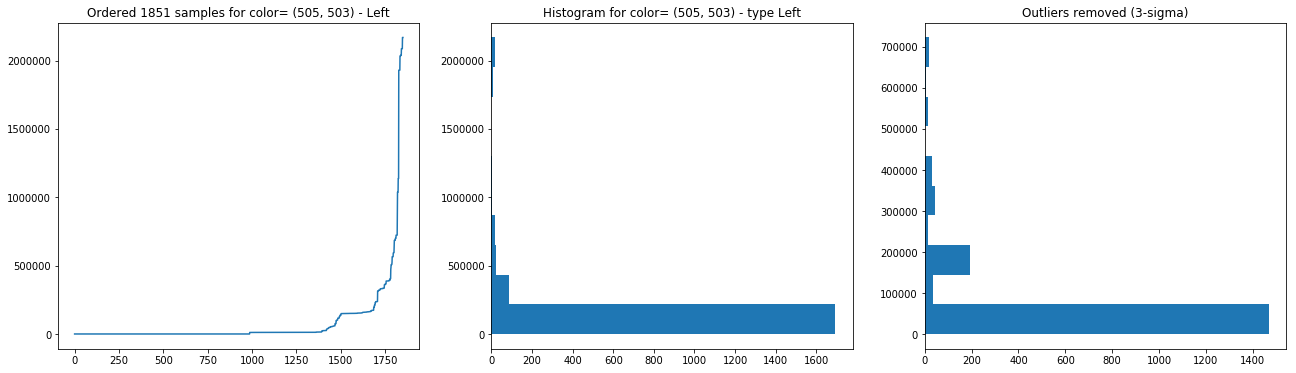

color 465:
[maci::LibraryManager - maci::LibraryManager::load] Full path '${PATH}/libAntInterferometryController.so'

color 466:
[maci::LibraryManager - maci::LibraryManager::load] Loaded '${PATH}/libAntInterferometryController.so'.



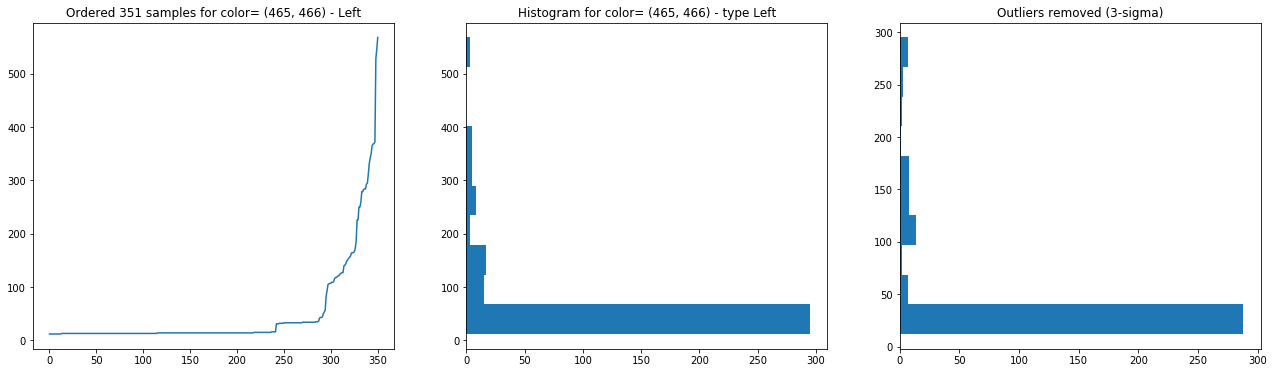

color 400:
[CONTROL/${ANT}/LOtwoBBpr_C - virtual void LO${N}Engine::setFrequency(double, Control::LOOffsettingMode, NetSidebandMod::NetSideband, ACS::Time)] Setting the LO${N} frequency to ${N}GHz at ${N}:${N}:${N}. This baseband is above the first LO. No LO offsetting will be used Retuning as this is diferent from the current state at this time

color 579:
[CONTROL/${ANT}/LOtwoBBpr_B - virtual void LO${N}Engine::setFrequency(double, Control::LOOffsettingMode, NetSidebandMod::NetSideband, ACS::Time)] Setting the LO${N} frequency to ${N}GHz at ${N}:${N}:${N}. This baseband is below the first LO. Two LO offsetting will be used Retuning as this is diferent from the current state at this time



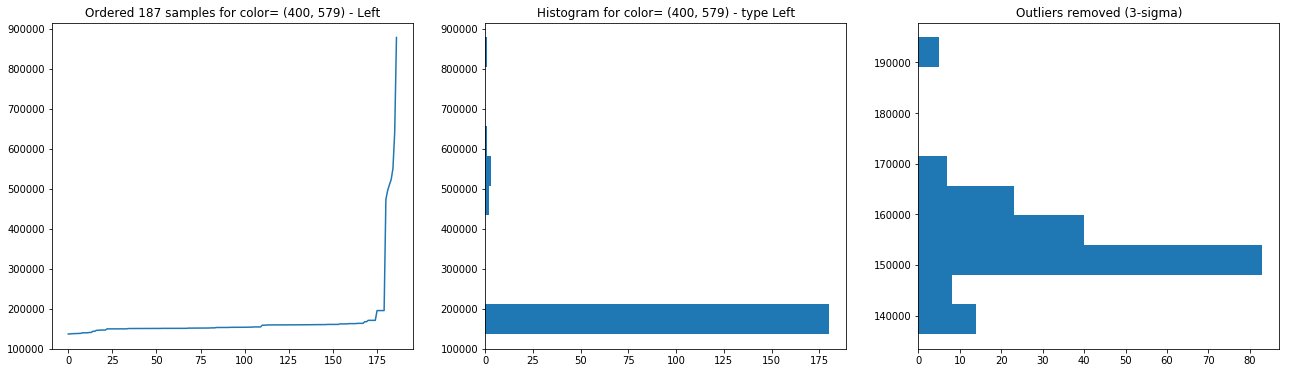

In [18]:
analysis_for( "Left" )

## Analysis for Coupled series

color 473:
[maci::LibraryManager - maci::LibraryManager::load] Request to load 'TotalPowerImpl'.

color 477:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: INITIALIZING -> INITIALIZED



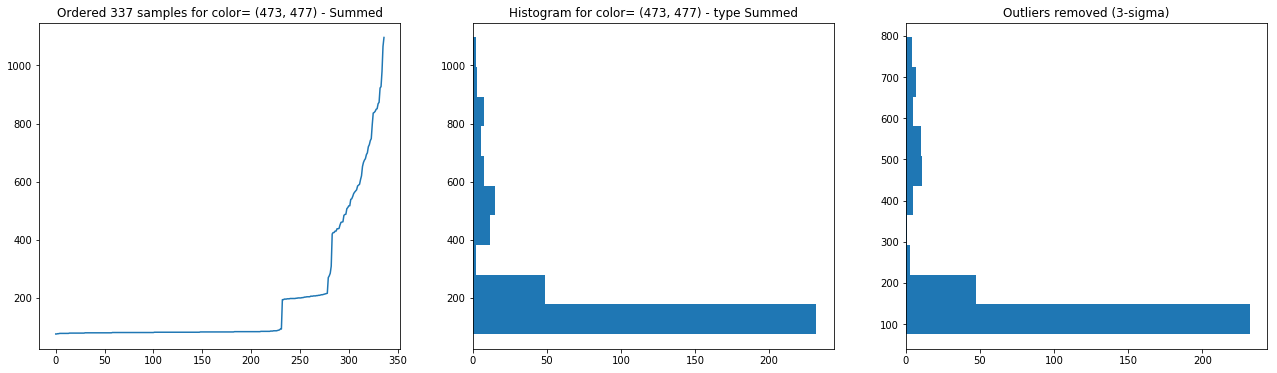

color 495:
[CONTROL/${ANT}/FrontEnd/WCA${N} - maximizeIFTP] (initial) coarse tune: : ${N} Initial IFTP: ${N}

color 498:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::lockFrontEndInternal(Control::FrontEnd::SubscanInformation, bool, bool)] Done Offsetting Floog



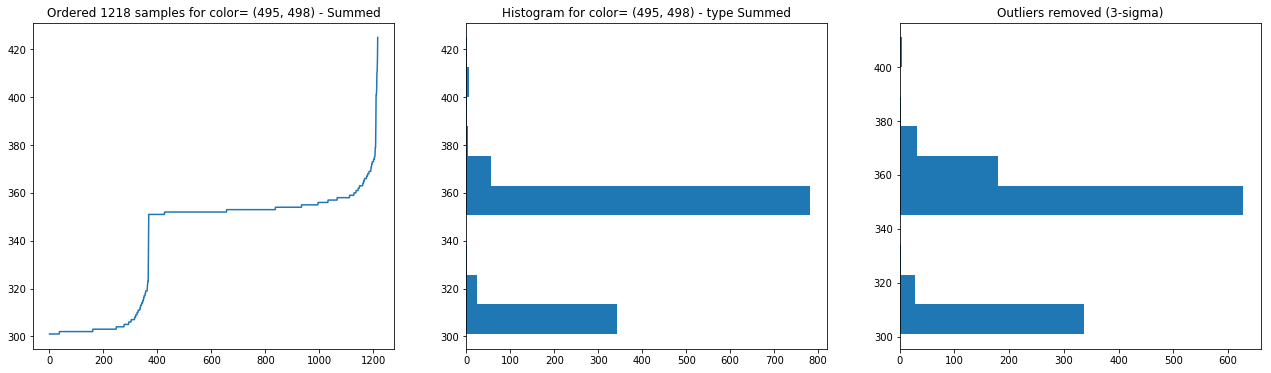

color 480:
[CONTROL/${ANT}/TOTALPOWER - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT})

color 484:
[CONTROL/${ANT}/IFProc_B - beginDataAcquisition] Data acquisition activated.



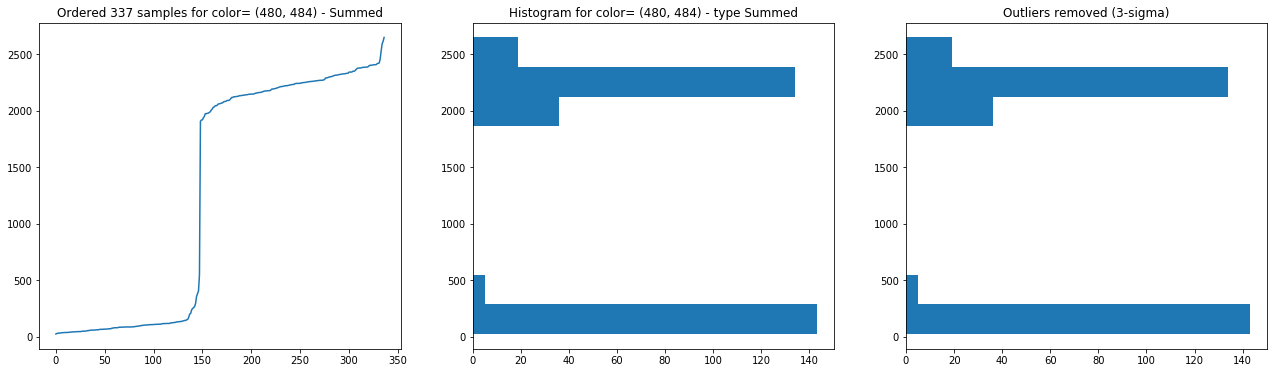

color 474:
[maci::LibraryManager - maci::LibraryManager::load] Full path '${PATH}/libTotalPowerImpl.so'

color 476:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: NEW -> INITIALIZING



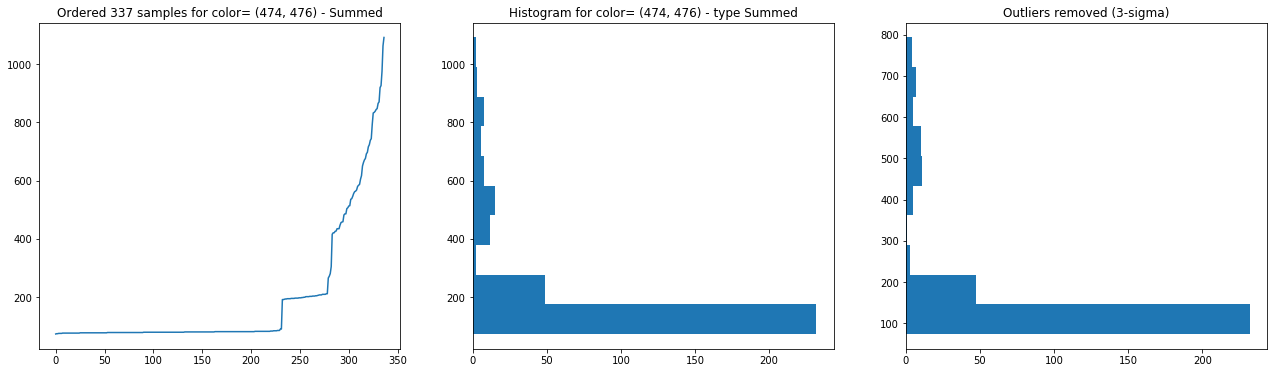

color 477:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: INITIALIZING -> INITIALIZED

color 483:
[CONTROL/${ANT}/IFProc_A - beginDataAcquisition] Data acquisition activated.



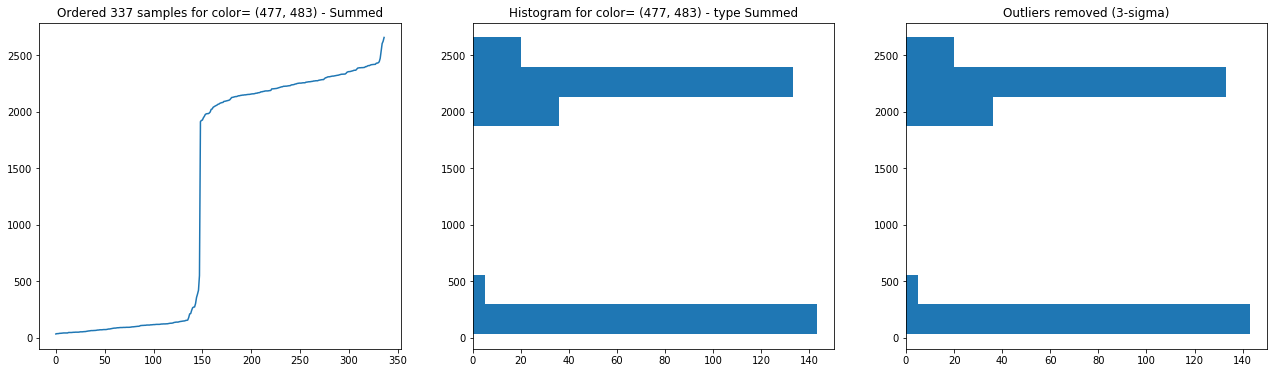

color 474:
[maci::LibraryManager - maci::LibraryManager::load] Full path '${PATH}/libTotalPowerImpl.so'

color 480:
[CONTROL/${ANT}/TOTALPOWER - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT})



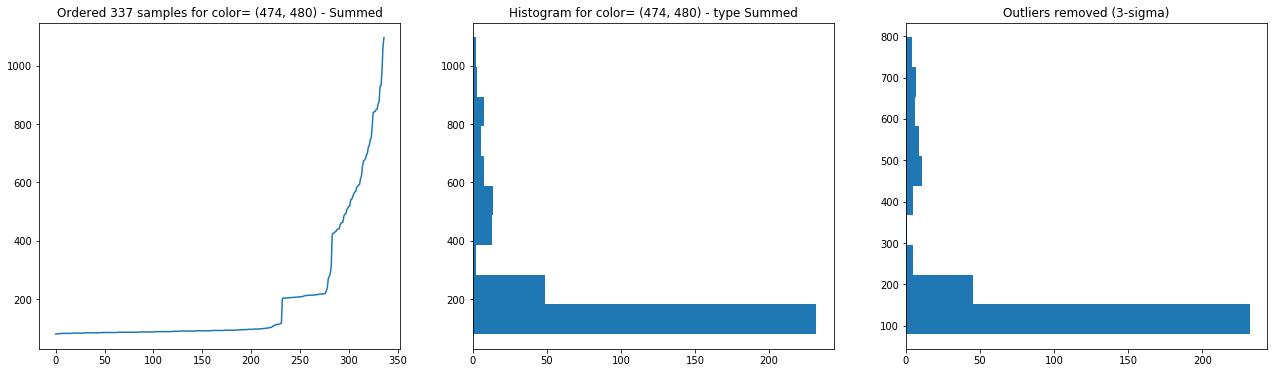

color 481:
[CONTROL/${ANT}/TOTALPOWER - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/IFProc_A)

color 483:
[CONTROL/${ANT}/IFProc_A - beginDataAcquisition] Data acquisition activated.



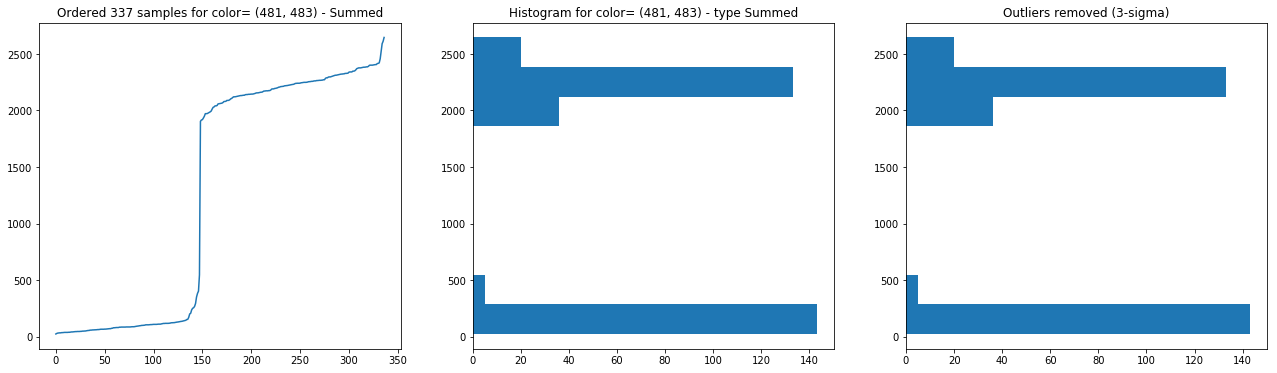

color 478:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/TOTALPOWER: INITIALIZED -> OPERATIONAL

color 483:
[CONTROL/${ANT}/IFProc_A - beginDataAcquisition] Data acquisition activated.



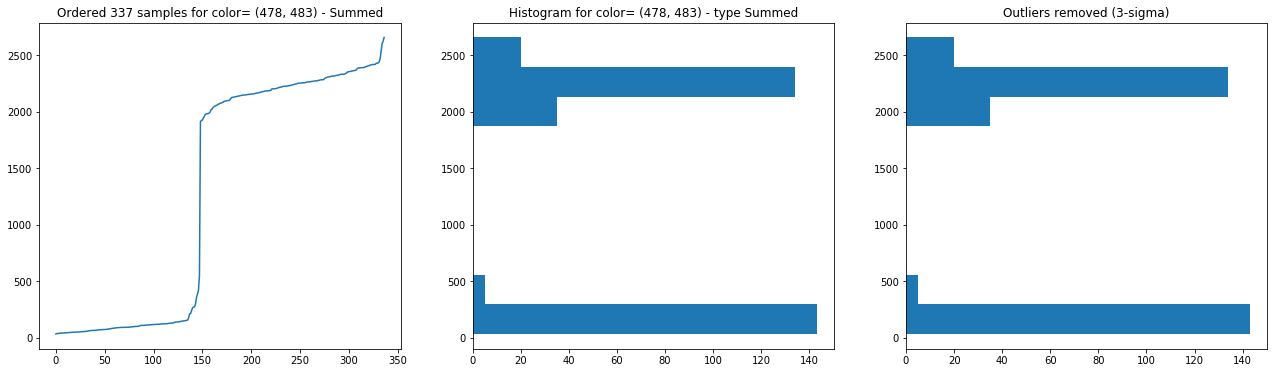

color 481:
[CONTROL/${ANT}/TOTALPOWER - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT}/IFProc_A)

color 484:
[CONTROL/${ANT}/IFProc_B - beginDataAcquisition] Data acquisition activated.



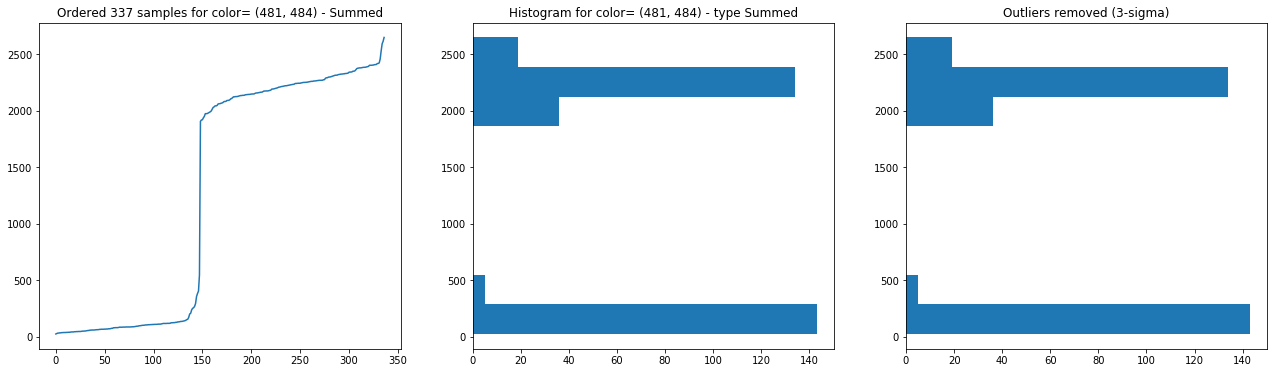

In [19]:
analysis_for( "Summed" )

color 468:
[CONTROL/${ANT}/cppContainer-GL - ] Switched state of component CONTROL/${ANT}/AntInterferometryController: INITIALIZING -> INITIALIZED

color 471:
[CONTROL/${ANT}/AntInterferometryController - ] ContainerServices::getComponentNonSticky(CONTROL/${ANT})



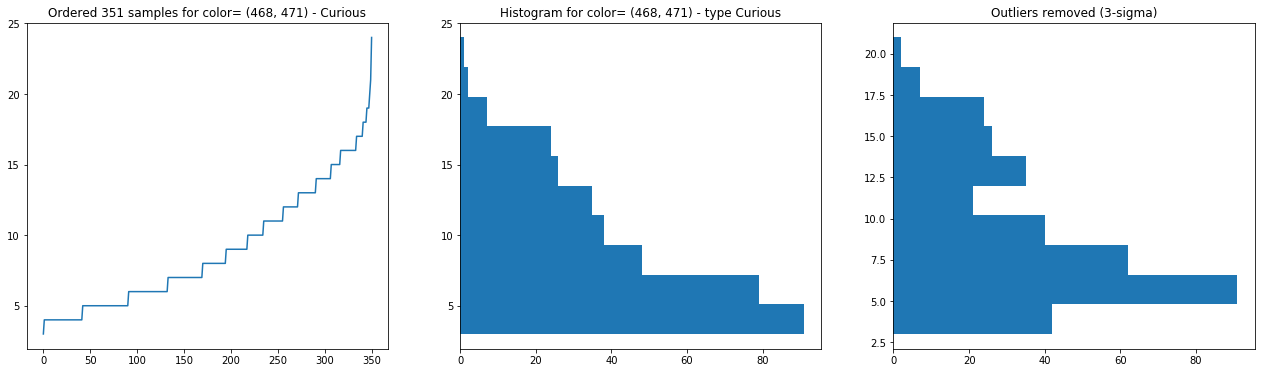

color 493:
[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::lockFrontEndInternal(Control::FrontEnd::SubscanInformation, bool, bool)] Setting band ${N} park frequency to ${N}

color 497:
[CONTROL/${ANT}/FrontEnd/WCA${N} - maximizeIFTP] Optimal coarse tune: : ${N} Optimal IFTP: ${N}



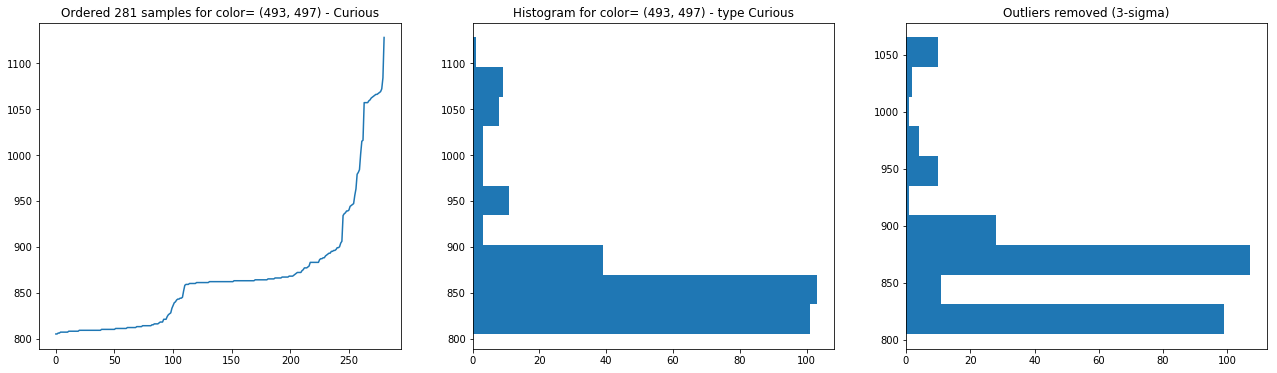

In [20]:
analysis_for( "Curious" )